# Data Cleaning and EDA

### Contents:
 - [Import Data](#Import-Data)
 - [Evaluate Missing Values](#Evaluate-Missing-Values)
 - [EDA](#EDA)
 - [Export Clean Data](#Export-Clean-Data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data 

In [2]:
df = pd.read_csv('../data/outbreaks.csv')

In [3]:
df.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19119 entries, 0 to 19118
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               19119 non-null  int64  
 1   Month              19119 non-null  object 
 2   State              19119 non-null  object 
 3   Location           16953 non-null  object 
 4   Food               10156 non-null  object 
 5   Ingredient         1876 non-null   object 
 6   Species            12500 non-null  object 
 7   Serotype/Genotype  3907 non-null   object 
 8   Status             12500 non-null  object 
 9   Illnesses          19119 non-null  int64  
 10  Hospitalizations   15494 non-null  float64
 11  Fatalities         15518 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 1.8+ MB


In [5]:
df.shape

(19119, 12)

## Evaluate Missing Values 

In [6]:
df.isna().sum()

Year                     0
Month                    0
State                    0
Location              2166
Food                  8963
Ingredient           17243
Species               6619
Serotype/Genotype    15212
Status                6619
Illnesses                0
Hospitalizations      3625
Fatalities            3601
dtype: int64

In [7]:
# missing most of ingredient column will drop column

In [8]:
df.drop('Ingredient', axis = 1, inplace = True)

In [9]:
# missing most of Serortype/Genotype will drop column

In [10]:
df.drop('Serotype/Genotype', axis = 1, inplace = True)

In [11]:
df.isna().sum()

Year                   0
Month                  0
State                  0
Location            2166
Food                8963
Species             6619
Status              6619
Illnesses              0
Hospitalizations    3625
Fatalities          3601
dtype: int64

In [12]:
df.head()

,Year,Month,State,Location,Food,Species,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",Scombroid toxin,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Salmonella enterica,Confirmed,26,3.0,0.0


In [13]:
#not too interested in evaluating the status column more interested in evaluating food, species and hospitalizations will drop

In [14]:
df.drop('Status', axis = 1, inplace = True)

In [15]:
df.isna().sum()

Year                   0
Month                  0
State                  0
Location            2166
Food                8963
Species             6619
Illnesses              0
Hospitalizations    3625
Fatalities          3601
dtype: int64

In [16]:
df['Fatalities'].value_counts()

0.0     15342
1.0       125
2.0        27
3.0         9
4.0         3
7.0         3
5.0         3
6.0         2
21.0        1
8.0         1
33.0        1
9.0         1
Name: Fatalities, dtype: int64

In [17]:
#can fill fatalities with mode with simple imputer in pipeline when modeling since most data points appear to have 0 fatalities 

In [18]:
df['Location'].value_counts()

Restaurant                                                             10448
Private Home/Residence                                                  1681
Catering Service                                                        1089
Banquet Facility                                                         367
Fast Food Restaurant                                                     366
                                                                       ...  
Restaurant; Private Home/Residence; Catering Service; Grocery Store        1
Restaurant; Restaurant; Banquet Facility                                   1
Restaurant; Hospital; School/College/University                            1
Child Daycare; School/College/University                                   1
Private Home/Residence; Banquet Facility; Unknown                          1
Name: Location, Length: 161, dtype: int64

In [19]:
# most occur at restaurants can fill missing data with simple imputer in pipline when modeling with most frequent

In [20]:
df['Hospitalizations'].value_counts()

0.0      11439
1.0       1886
2.0        844
3.0        422
4.0        229
         ...  
204.0        1
200.0        1
71.0         1
39.0         1
58.0         1
Name: Hospitalizations, Length: 61, dtype: int64

In [21]:
# want to look at hospitalization data, species and the food so we will only keep rows that have that information

In [22]:
clean_df = df[df['Hospitalizations'].notna()]

In [24]:
clean_df = clean_df[clean_df['Species'].notna()]

In [25]:
clean_df = clean_df[clean_df['Food'].notna()]

In [27]:
clean_df.isna().sum()

Year                  0
Month                 0
State                 0
Location            665
Food                  0
Species               0
Illnesses             0
Hospitalizations      0
Fatalities          174
dtype: int64

In [28]:
clean_df.shape

(6025, 9)

## EDA

In [32]:
clean_df.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,6025.000000,6025.000000,6025.000000,5851.000000
mean,2006.040498,25.128631,1.673527,0.039993
std,5.062985,60.162922,8.097194,0.588587
min,1998.000000,2.000000,0.000000,0.000000
25%,2002.000000,4.000000,0.000000,0.000000
50%,2006.000000,10.000000,0.000000,0.000000
75%,2010.000000,25.000000,1.000000,0.000000
max,2015.000000,1644.000000,308.000000,33.000000


From descriptives, we can see mean of 1.67 hospitalizations per outbreak with mean of 0 fatalities per outbreak. Max number of hospitalizations for a given outbreak was 308 people and the largest amount of fatalities from a single outbreak in this data set was 33. The greatest amount of people that were sick from an outbreak was 1644.

In [74]:
#outbreak with the largest Hospitalizations

In [75]:
clean_df['Hospitalizations'].max()

mask = clean_df['Hospitalizations'] == 308.0

clean_df[mask]

,Year,Month,State,Location,Food,Species,Illnesses,Hospitalizations,Fatalities
12678,2008,April,Multistate,NaN,"Peppers, Jalapeno; Tomato, Unspecified; Pepper...",Salmonella enterica,1500,308.0,2.0


In [76]:
#Outbreak with the largest fatalities 

In [77]:
clean_df['Fatalities'].max()

33.0

In [78]:
mask = clean_df['Fatalities'] == 33.0

clean_df[mask]

,Year,Month,State,Location,Food,Species,Illnesses,Hospitalizations,Fatalities
15329,2011,July,Multistate,Private Home/Residence,Cantaloupe,Listeria monocytogenes,147,143.0,33.0


In [79]:
#Outbreak with the largest number of illnesses 

In [80]:
clean_df['Illnesses'].max()

1644

In [82]:
mask = clean_df['Illnesses'] == 1644

clean_df[mask]

,Year,Month,State,Location,Food,Species,Illnesses,Hospitalizations,Fatalities
10396,2006,May,California,Prison/Jail,"Other Milk, Pasteurized",Campylobacter jejuni,1644,7.0,0.0


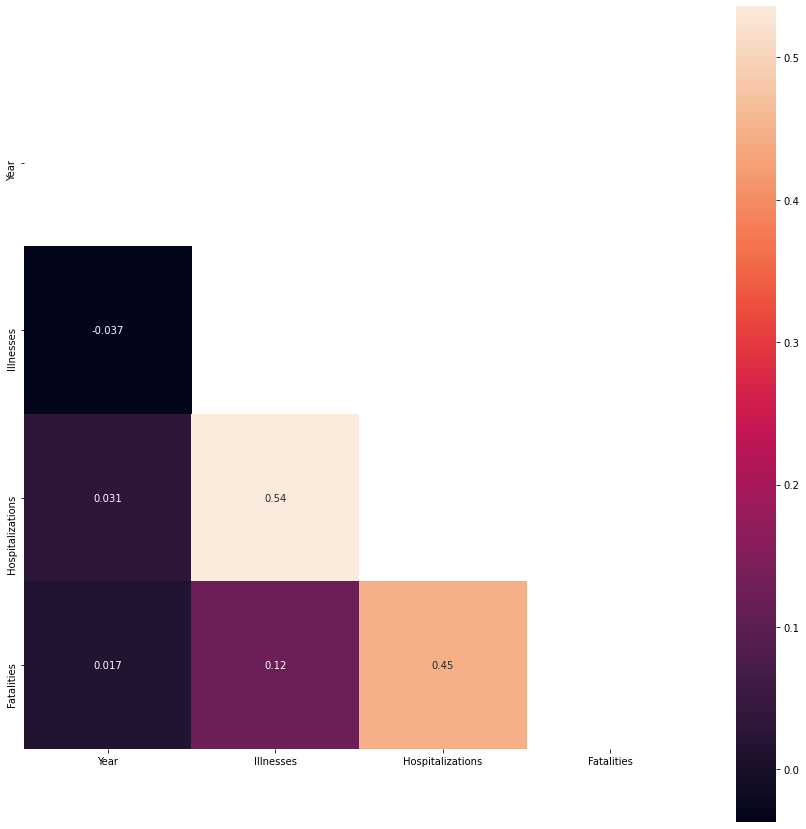

In [33]:
plt.figure(figsize=(15,15)) 
mask = np.zeros_like(clean_df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(clean_df.corr(), annot = True, mask = mask, square = True);

From the heatmap, we can see that the amount of people that were ill from an outbreak and were hospitalized is slightly correlated at 0.54 and there is a slight correlation with people that were hospitalized for an outbreak with fatalities at 0.45. 

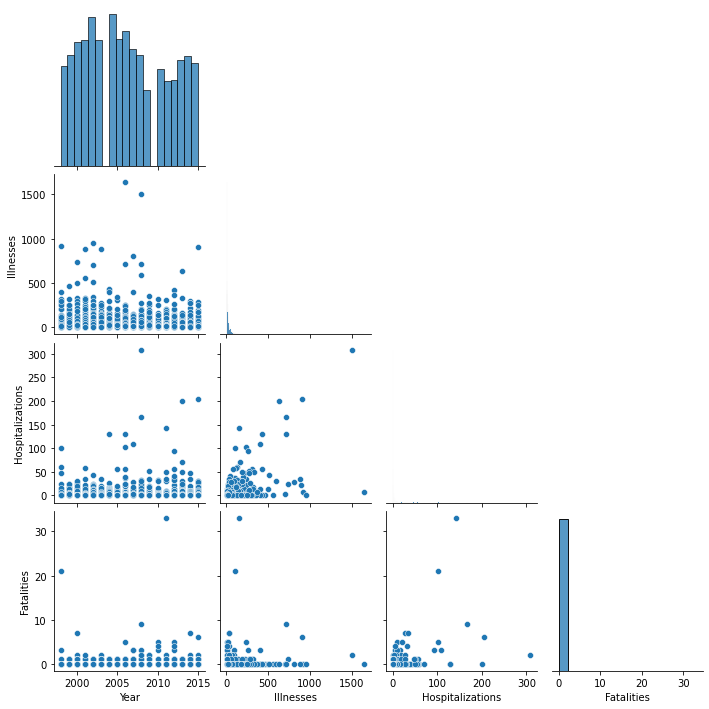

In [34]:
sns.pairplot(data = clean_df, corner = True);

From the pairplot, we can see that when there are a greater number of hospitalizations were see an association with increase in fatalities. There is a similiar association with illness and hospitalization. As more people are sick during an outbreak there is an association with a greater number of hospitalizations.

In [85]:
#Top 10 Foods that Cause Outbreaks

In [63]:
top_10_food = clean_df['Food'].value_counts().head(10)
top_10_food

Oysters, Raw                        114
Multiple Foods                      101
Fish, Mahi Mahi                      66
Salad, Unspecified                   64
Pork, Bbq                            56
Sandwich, Submarine                  51
Fish, Ahi                            50
Lettuce-Based Salads Unspecified     47
Ground Beef, Hamburger               46
Tuna, Unspecified                    45
Name: Food, dtype: int64

Top foods to cause outbreaks the categories of oysters, multiple foods,fish, salas, port and submarine sandwhich, fish, ahi, lettuce-based salads, ground beef, tuna

In [ ]:
# Top 10 Species that Cause Outbreaks 

In [65]:
top_10_species = clean_df['Species'].value_counts().head(10)
top_10_species

Salmonella enterica                        1166
Norovirus genogroup I                      1014
Clostridium perfringens                     495
Norovirus genogroup II                      454
Scombroid toxin                             313
Staphylococcus aureus                       299
Escherichia coli, Shiga toxin-producing     284
Norovirus unknown                           255
Ciguatoxin                                  227
Bacillus cereus                             193
Name: Species, dtype: int64

Top 3 species are salmonella enterica, norovirus genogroup I, and c. perfringens.

In [86]:
#Top 10 States that have Outbreaks 

In [84]:
clean_df['State'].value_counts().head(10)

California    890
Florida       642
Minnesota     472
New York      300
Ohio          299
Washington    281
Multistate    252
Hawaii        252
Colorado      190
Illinois      187
Name: State, dtype: int64

Most outbreaks from this dataset occur in California, Florida, and Minnesota

#Worst Years for Outbreaks

In [88]:
clean_df['Year'].value_counts().head(10)

2004    449
2002    441
2006    398
2005    375
2001    372
2003    371
2000    366
2007    345
1999    328
2008    328
Name: Year, dtype: int64

Most of the outbreaks in this dataset occured in 2004, second in 2002 and third in 2006

## Export Clean Data

In [30]:
clean_df.to_csv('../data/clean_df.csv')